<a href="https://colab.research.google.com/github/Dinhthixuanbinh/f_minst_acc-90/blob/main/Yolo_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import requests
import cv2
import matplotlib.pyplot as plt
import glob
import random
import os

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.5 MB/s eta 0:00:00


In [ ]:
os.makedirs('datasets', exist_ok=True)

In [ ]:
%cd datasets

/content/datasets


In [ ]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

unzip('/content/drive/MyDrive/Colab Notebooks/Data/Stanford_Car.v4-original_raw-images.yolov8.zip')


Extracted all


In [ ]:
%cd ..

/content


In [ ]:
# Function to convert bounding boxes in YOLO format to xmin, ymin, xmax, ymax.
def yolo2bbox(bboxes):
    xmin, ymin = bboxes[0]-bboxes[2]/2, bboxes[1]-bboxes[3]/2
    xmax, ymax = bboxes[0]+bboxes[2]/2, bboxes[1]+bboxes[3]/2
    return xmin, ymin, xmax, ymax

In [ ]:
def plot_box(image, bboxes, labels):
    # Need the image height and width to denormalize
    # the bounding box coordinates
    h, w, _ = image.shape
    for box_num, box in enumerate(bboxes):
        x1, y1, x2, y2 = yolo2bbox(box)
        # Denormalize the coordinates.
        xmin = int(x1*w)
        ymin = int(y1*h)
        xmax = int(x2*w)
        ymax = int(y2*h)

        thickness = max(2, int(w/275))

        cv2.rectangle(
            image,
            (xmin, ymin), (xmax, ymax),
            color=(0, 0, 255),
            thickness=thickness
        )
    return image

In [ ]:
def plot(image_paths, label_paths, num_samples):
    all_images = []
    all_images.extend(glob.glob(image_paths+'/*.jpg'))
    all_images.extend(glob.glob(image_paths+'/*.JPG'))

    all_images.sort()

    num_images = len(all_images)

    plt.figure(figsize=(15, 12))
    for i in range(num_samples):
        j = random.randint(0,num_images-1)
        image_name = all_images[j]
        image_name = '.'.join(image_name.split(os.path.sep)[-1].split('.')[:-1])
        image = cv2.imread(all_images[j])
        with open(os.path.join(label_paths, image_name+'.txt'), 'r') as f:
            bboxes = []
            labels = []
            label_lines = f.readlines()
            for label_line in label_lines:
                label = label_line[0]
                bbox_string = label_line[1:].split(' ')
                bbox_string_list = bbox_string
                x_c, y_c, w, h = bbox_string_list[1:]
                x_c = float(x_c)
                y_c = float(y_c)
                w = float(w)
                h = float(h)
                bboxes.append([x_c, y_c, w, h])
                labels.append(label)
        result_image = plot_box(image, bboxes, labels)
        for i, bbox in enumerate(bboxes):
            x_c, y_c, w, h = bbox
            plt.text(x_c, y_c, labels[i], color='blue', fontsize=10)
        plt.subplot(2, 2, i+1)
        plt.imshow(result_image[:, :, ::-1])
        plt.axis('off')
    plt.subplots_adjust(wspace=1)
    plt.tight_layout()
    plt.show()

<ipython-input-14-ecb8a195b884>:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i+1)


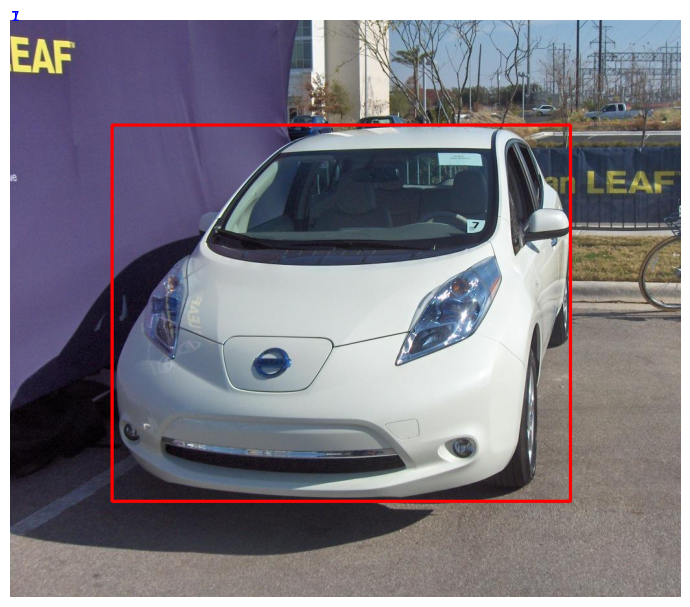

In [ ]:
# Visualize a few training images.
plot(
    image_paths='datasets/train/images',
    label_paths='datasets/train/labels',
    num_samples=4,
)

In [ ]:
%%writefile data.yaml
train: train/images
val: valid/images
test: test/images

nc: 208
names: ['AM General Hummer SUV 2000', 'Acura Integra Type R 2001', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi A5 Coupe 2012', 'Audi R8 Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi S4 Sedan 2007', 'Audi S4 Sedan 2012', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S6 Sedan 2011', 'Audi TT Hatchback 2011', 'Audi TT RS Coupe 2012', 'Audi TTS Coupe 2012', 'Audi V8 Sedan 1994', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW Z4 Convertible 2012', 'Bentley Arnage Sedan 2009', 'Bentley Continental Flying Spur Sedan 2007', 'Bentley Continental GT Coupe 2007', 'Bentley Continental GT Coupe 2012', 'Bentley Continental Supersports Conv- Convertible 2012', 'Bentley Mulsanne Sedan 2011', 'Bugatti Veyron 16-4 Convertible 2009', 'Bugatti Veyron 16-4 Coupe 2009', 'Buick Enclave SUV 2012', 'Buick Rainier SUV 2007', 'Buick Regal GS 2012', 'Buick Verano Sedan 2012', 'Cadillac CTS-V Sedan 2012', 'Cadillac Escalade EXT Crew Cab 2007', 'Cadillac SRX SUV 2012', 'Chevrolet Avalanche Crew Cab 2012', 'Chevrolet Camaro Convertible 2012', 'Chevrolet Cobalt SS 2010', 'Chevrolet Corvette Convertible 2012', 'Chevrolet Corvette Ron Fellows Edition Z06 2007', 'Chevrolet Corvette ZR1 2012', 'Chevrolet Express Cargo Van 2007', 'Chevrolet Express Van 2007', 'Chevrolet HHR SS 2010', 'Chevrolet Impala Sedan 2007', 'Chevrolet Malibu Hybrid Sedan 2010', 'Chevrolet Malibu Sedan 2007', 'Chevrolet Monte Carlo Coupe 2007', 'Chevrolet Silverado 1500 Classic Extended Cab 2007', 'Chevrolet Silverado 1500 Extended Cab 2012', 'Chevrolet Silverado 1500 Hybrid Crew Cab 2012', 'Chevrolet Silverado 1500 Regular Cab 2012', 'Chevrolet Silverado 2500HD Regular Cab 2012', 'Chevrolet Sonic Sedan 2012', 'Chevrolet Tahoe Hybrid SUV 2012', 'Chevrolet TrailBlazer SS 2009', 'Chevrolet Traverse SUV 2012', 'Chrysler 300 SRT-8 2010', 'Chrysler Aspen SUV 2009', 'Chrysler Crossfire Convertible 2008', 'Chrysler PT Cruiser Convertible 2008', 'Chrysler Sebring Convertible 2010', 'Chrysler Town and Country Minivan 2012', 'Daewoo Nubira Wagon 2002', 'Dodge Caliber Wagon 2007', 'Dodge Caliber Wagon 2012', 'Dodge Caravan Minivan 1997', 'Dodge Challenger SRT8 2011', 'Dodge Charger SRT-8 2009', 'Dodge Charger Sedan 2012', 'Dodge Dakota Club Cab 2007', 'Dodge Dakota Crew Cab 2010', 'Dodge Durango SUV 2007', 'Dodge Durango SUV 2012', 'Dodge Journey SUV 2012', 'Dodge Magnum Wagon 2008', 'Dodge Ram Pickup 3500 Crew Cab 2010', 'Dodge Ram Pickup 3500 Quad Cab 2009', 'Dodge Sprinter Cargo Van 2009', 'Eagle Talon Hatchback 1998', 'FIAT 500 Abarth 2012', 'FIAT 500 Convertible 2012', 'Ferrari 458 Italia Convertible 2012', 'Ferrari 458 Italia Coupe 2012', 'Ferrari California Convertible 2012', 'Ferrari FF Coupe 2012', 'Fisker Karma Sedan 2012', 'Ford E-Series Wagon Van 2012', 'Ford Edge SUV 2012', 'Ford Expedition EL SUV 2009', 'Ford F-150 Regular Cab 2007', 'Ford F-150 Regular Cab 2012', 'Ford F-450 Super Duty Crew Cab 2012', 'Ford Fiesta Sedan 2012', 'Ford Focus Sedan 2007', 'Ford Freestar Minivan 2007', 'Ford GT Coupe 2006', 'Ford Mustang Convertible 2007', 'Ford Ranger SuperCab 2011', 'GMC Acadia SUV 2012', 'GMC Canyon Extended Cab 2012', 'GMC Savana Van 2012', 'GMC Terrain SUV 2012', 'GMC Yukon Hybrid SUV 2012', 'Geo Metro Convertible 1993', 'HUMMER H2 SUT Crew Cab 2009', 'HUMMER H3T Crew Cab 2010', 'Honda Accord Coupe 2012', 'Honda Accord Sedan 2012', 'Honda Odyssey Minivan 2007', 'Honda Odyssey Minivan 2012', 'Hyundai Accent Sedan 2012', 'Hyundai Azera Sedan 2012', 'Hyundai Elantra Sedan 2007', 'Hyundai Elantra Touring Hatchback 2012', 'Hyundai Genesis Sedan 2012', 'Hyundai Santa Fe SUV 2012', 'Hyundai Sonata Hybrid Sedan 2012', 'Hyundai Sonata Sedan 2012', 'Hyundai Tucson SUV 2012', 'Hyundai Veloster Hatchback 2012', 'Hyundai Veracruz SUV 2012', 'Infiniti G Coupe IPL 2012', 'Infiniti QX56 SUV 2011', 'Isuzu Ascender SUV 2008', 'Jaguar XK XKR 2012', 'Jeep Compass SUV 2012', 'Jeep Grand Cherokee SUV 2012', 'Jeep Liberty SUV 2012', 'Jeep Patriot SUV 2012', 'Jeep Wrangler SUV 2012', 'Lamborghini Aventador Coupe 2012', 'Lamborghini Diablo Coupe 2001', 'Lamborghini Gallardo LP 570-4 Superleggera 2012', 'Lamborghini Reventon Coupe 2008', 'Land Rover LR2 SUV 2012', 'Land Rover Range Rover SUV 2012', 'Lincoln Town Car Sedan 2011', 'MINI Cooper Roadster Convertible 2012', 'Maybach Landaulet Convertible 2012', 'Mazda Tribute SUV 2011', 'McLaren MP4-12C Coupe 2012', 'Mercedes-Benz 300-Class Convertible 1993', 'Mercedes-Benz C-Class Sedan 2012', 'Mercedes-Benz E-Class Sedan 2012', 'Mercedes-Benz S-Class Sedan 2012', 'Mercedes-Benz SL-Class Coupe 2009', 'Mercedes-Benz Sprinter Van 2012', 'Mitsubishi Lancer Sedan 2012', 'Nissan 240SX Coupe 1998', 'Nissan Juke Hatchback 2012', 'Nissan Leaf Hatchback 2012', 'Nissan NV Passenger Van 2012', 'Plymouth Neon Coupe 1999', 'Porsche Panamera Sedan 2012', 'Ram C-V Cargo Van Minivan 2012', 'Rolls-Royce Ghost Sedan 2012', 'Rolls-Royce Phantom Drophead Coupe Convertible 2012', 'Rolls-Royce Phantom Sedan 2012', 'Scion xD Hatchback 2012', 'Spyker C8 Convertible 2009', 'Spyker C8 Coupe 2009', 'Suzuki Aerio Sedan 2007', 'Suzuki Kizashi Sedan 2012', 'Suzuki SX4 Hatchback 2012', 'Suzuki SX4 Sedan 2012', 'Tesla Model S Sedan 2012', 'Toyota 4Runner SUV 2012', 'Toyota Camry Sedan 2012', 'Toyota Corolla Sedan 2012', 'Toyota Sequoia SUV 2012', 'Volkswagen Beetle Hatchback 2012', 'Volkswagen Golf Hatchback 1991', 'Volkswagen Golf Hatchback 2012', 'Volvo 240 Sedan 1993', 'Volvo C30 Hatchback 2012', 'Volvo XC90 SUV 2007', 'bicycle', 'bike', 'boat', 'bus', 'car', 'cng', 'easybike', 'leguna', 'moped', 'rickshaw', 'smart fortwo Convertible 2012', 'truck', 'van']

Writing data.yaml


In [ ]:
# EPOCHS = 10
# !yolo task=detect mode=train model=yolov8n.pt imgsz=1280 data= data.yaml epochs={EPOCHS} batch=11 name=yolov8n_car_type

Ultralytics YOLOv8.0.149 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, patience=50, batch=11, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_car_type, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/YOLO_Kaggle_result/runs/detect/yolov8n_car_type/weights/best.pt name=yolov8n_val data=data.yaml

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3373448 parameters, 0 gradients
val: Scanning /content/datasets/valid/labels.cache... 2530 images, 0 backgrounds, 0 corrupt: 100% 2530/2530 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 159/159 [01:18<00:00,  2.03it/s]
                   all       2530       2624      0.749      0.716      0.772      0.549
AM General Hummer SUV 2000       2530         12      0.768      0.827      0.909      0.568
Acura Integra Type R 2001       2530          8      0.652          1      0.817      0.565
   Acura RL Sedan 2012       2530          7      0.553      0.429      0.456      0.284
   Acura TL Sedan 2012       2530         15      0.734      0.867      0.781      0.544
  Acura TL Type-S 2008       2530          9      0.714      0.555      0.508      0.358
  Acura TSX Sedan 2012       2530         11      0

In [ ]:
!yolo task=detect \
mode=predict \
model='/content/drive/MyDrive/Colab Notebooks/YOLO_Kaggle_result/runs/detect/yolov8n_car_type/weights/best.pt' \
source=datasets/valid/images \
imgsz=1280 \
name=yolov8n_car_infer

WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/YOLO_Kaggle_result/runs/detect/yolov8n_car_type/weights/best.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.9s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics YOLOv8.0.157 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3373448 parameters, 0 gradients

image 1/2530 /content/datasets/valid/images/000012_jpg.rf.d9f6dc6b001997abb95f9b04c1dd59fc.jpg: 80

In [ ]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir, num_samples=4):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    random.shuffle(image_names)
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
        if i == num_samples-1:
            break
    plt.tight_layout()
    plt.show()

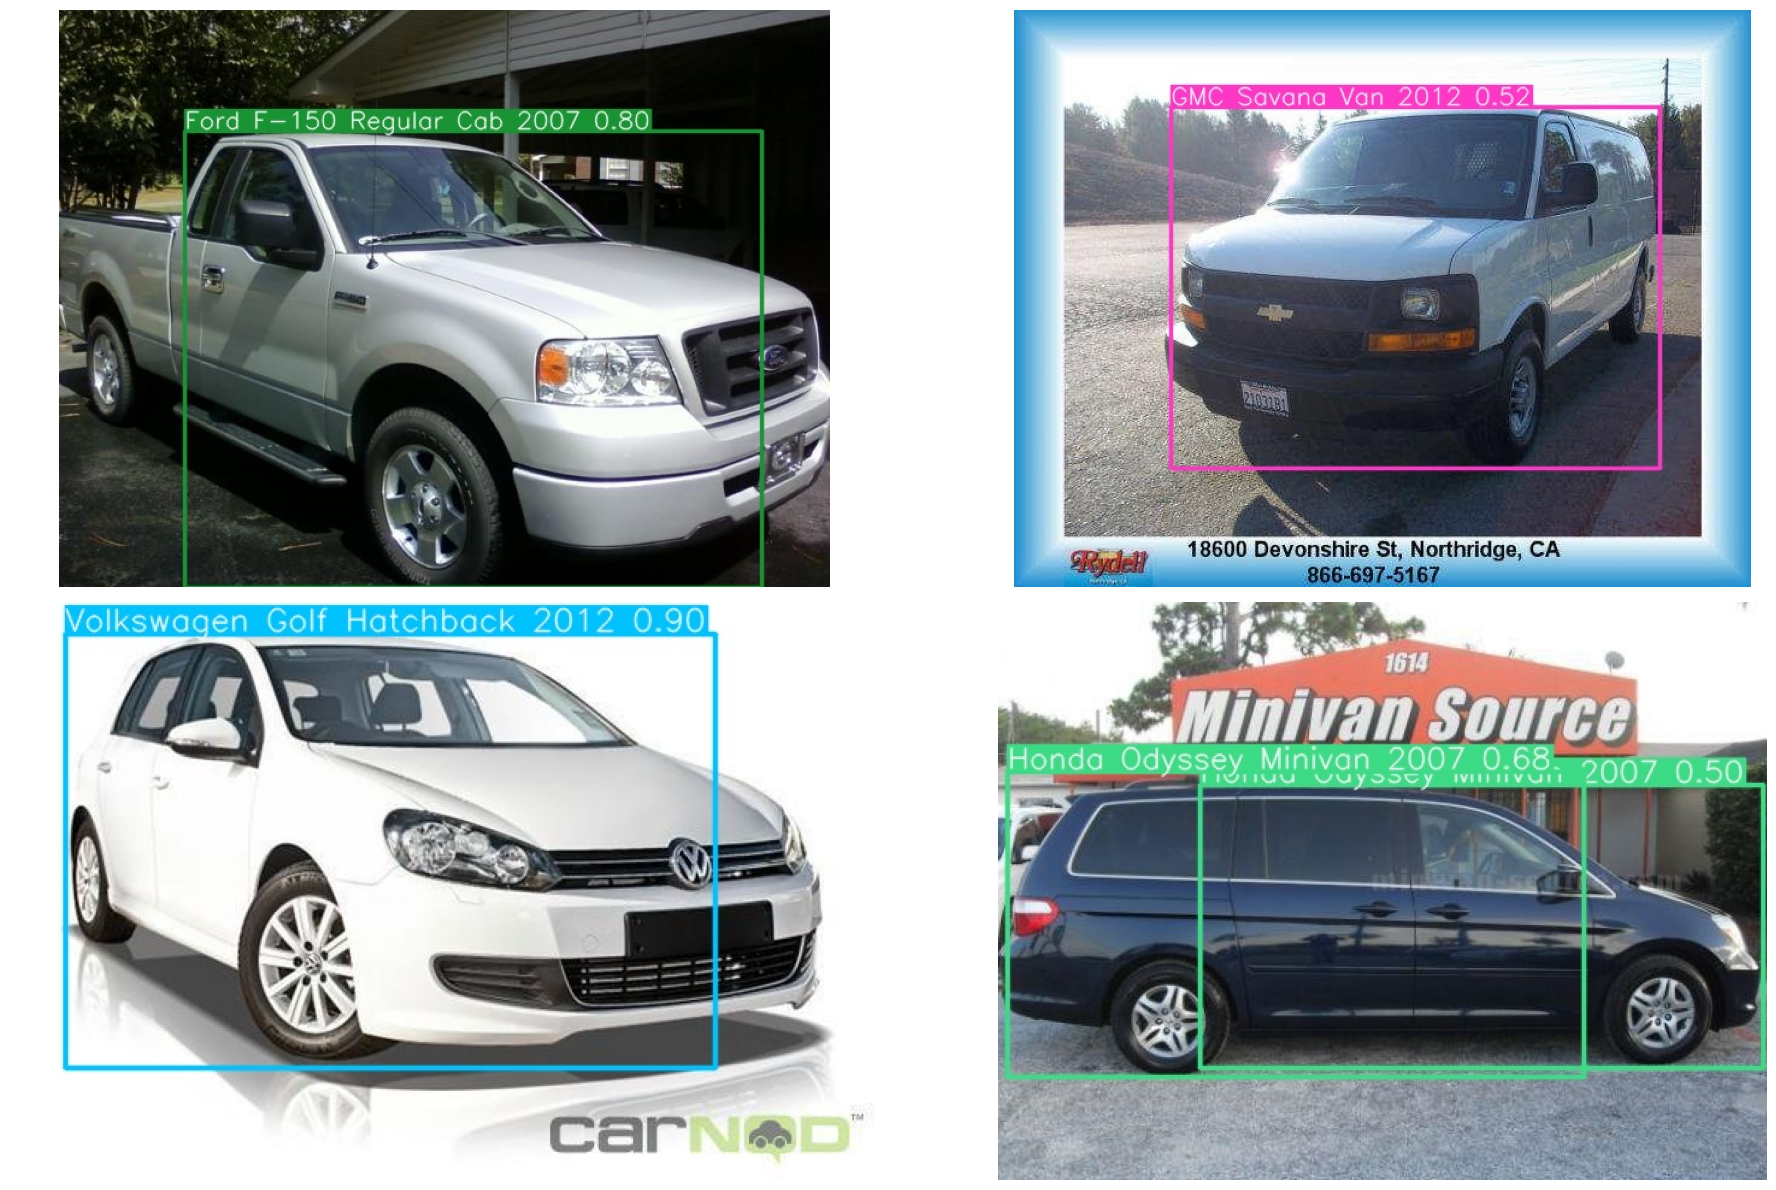

In [ ]:

visualize('/content/runs/detect/yolov8n_car_infer')